In [1]:
### Demos for  persp()  plots   -- things not in  example(persp)
### -------------------------

require(datasets)
require(grDevices); require(graphics)

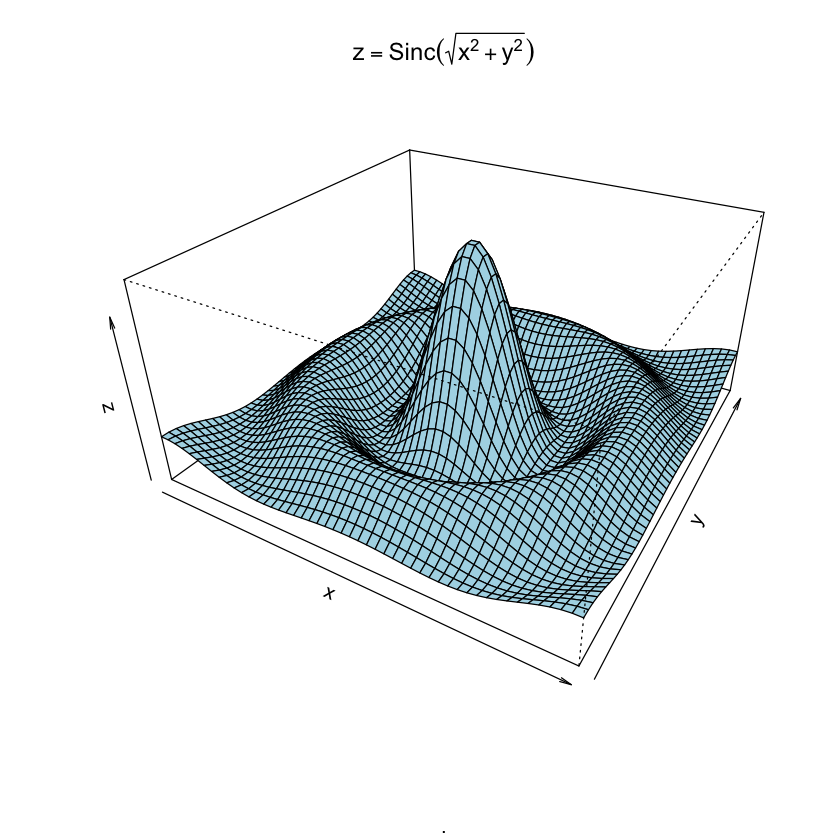

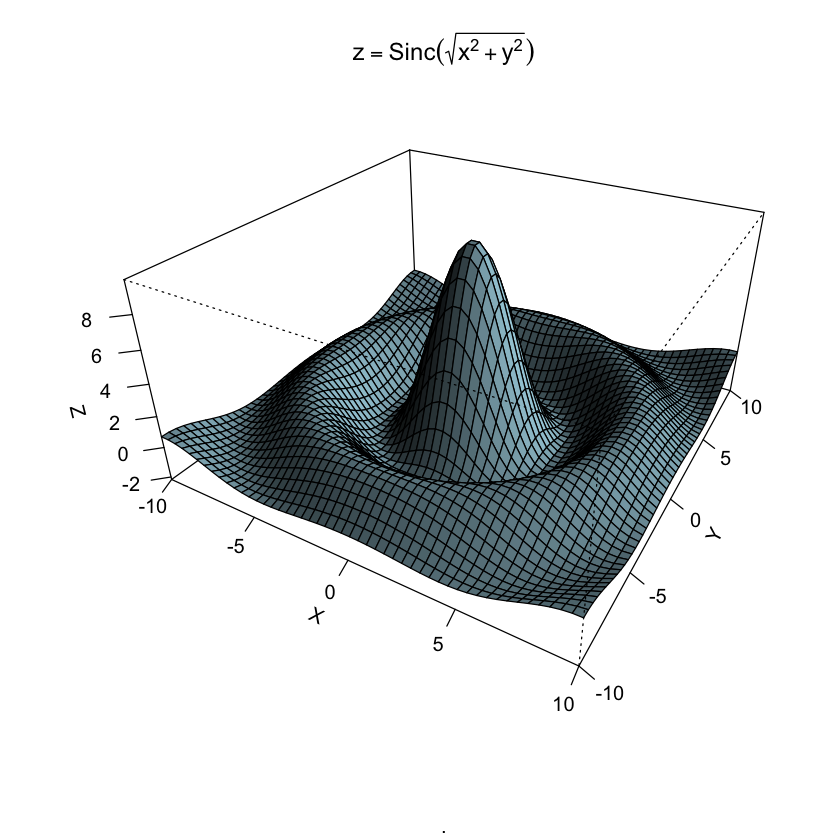

In [2]:
## (1) The Obligatory Mathematical surface.
##     Rotated sinc function.

x <- seq(-10, 10, length.out = 50)
y <- x
rotsinc <- function(x,y)
{
    sinc <- function(x) { y <- sin(x)/x ; y[is.na(y)] <- 1; y }
    10 * sinc( sqrt(x^2+y^2) )
}
sinc.exp <- expression(z == Sinc(sqrt(x^2 + y^2)))

z <- outer(x, y, rotsinc)


oldpar <- par(bg = "white")
persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue")
title(sub=".")## work around persp+plotmath bug
title(main = sinc.exp)

persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue",
      ltheta = 120, shade = 0.75, ticktype = "detailed",
      xlab = "X", ylab = "Y", zlab = "Z")
title(sub=".")## work around persp+plotmath bug
title(main = sinc.exp)

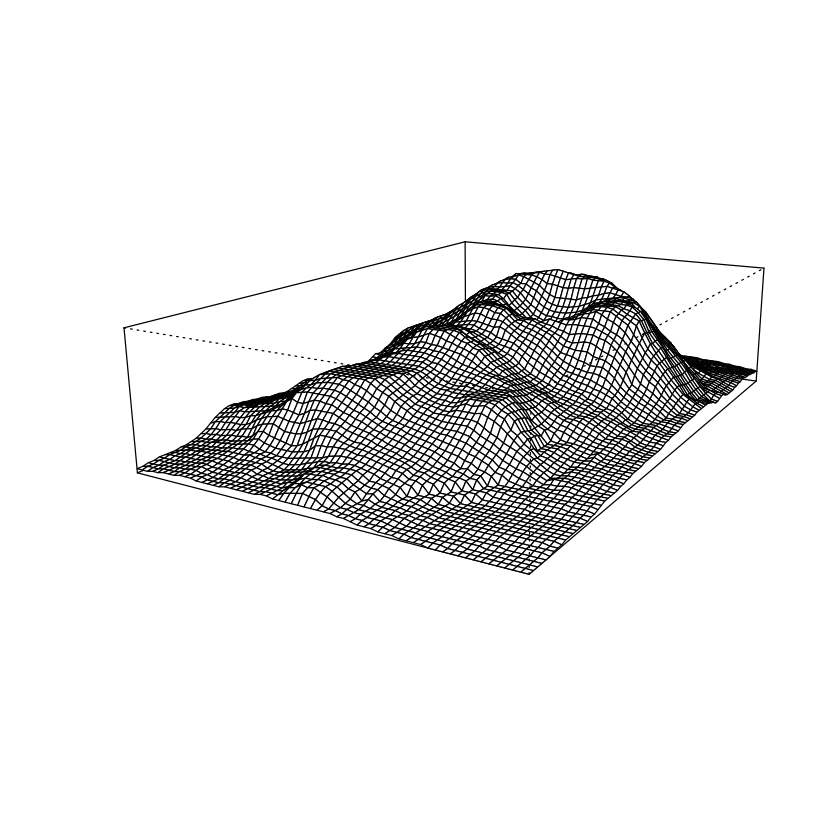

In [3]:
## (2) Visualizing a simple DEM model

z <- 2 * volcano        # Exaggerate the relief
x <- 10 * (1:nrow(z))   # 10 meter spacing (S to N)
y <- 10 * (1:ncol(z))   # 10 meter spacing (E to W)
persp(x, y, z, theta = 120, phi = 15, scale = FALSE, axes = FALSE)

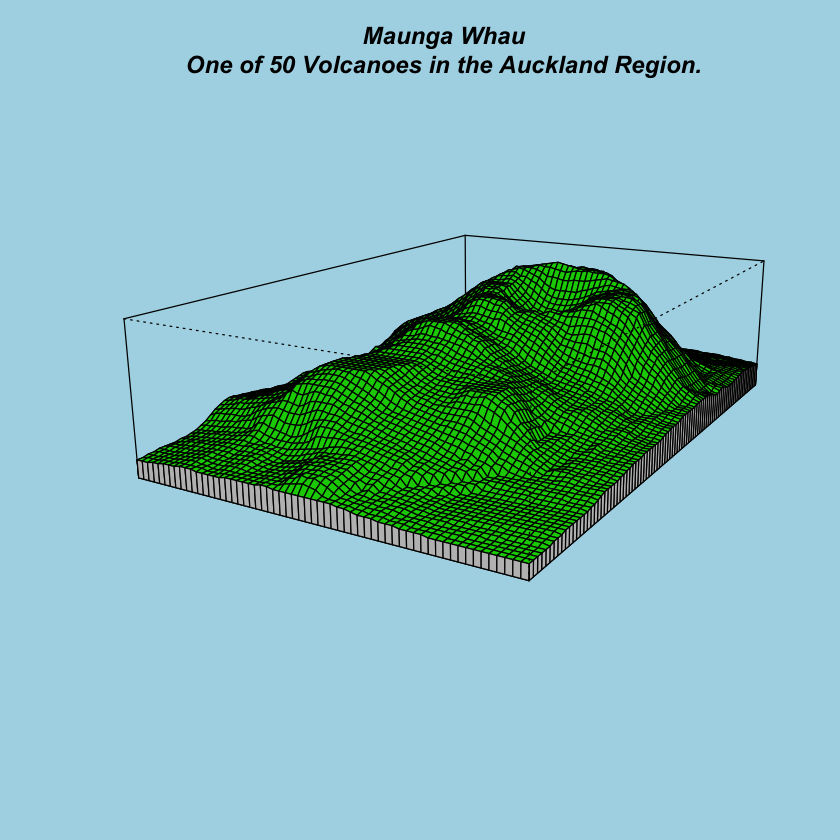

In [4]:
## (3) Now something more complex
##     We border the surface, to make it more "slice like"
##     and color the top and sides of the surface differently.

z0 <- min(z) - 20
z <- rbind(z0, cbind(z0, z, z0), z0)
x <- c(min(x) - 1e-10, x, max(x) + 1e-10)
y <- c(min(y) - 1e-10, y, max(y) + 1e-10)

fill <- matrix("green3", nrow = nrow(z)-1, ncol = ncol(z)-1)
fill[ , i2 <- c(1,ncol(fill))] <- "gray"
fill[i1 <- c(1,nrow(fill)) , ] <- "gray"

par(bg = "lightblue")
persp(x, y, z, theta = 120, phi = 15, col = fill, scale = FALSE, axes = FALSE)
title(main = "Maunga Whau\nOne of 50 Volcanoes in the Auckland Region.",
      font.main = 4)

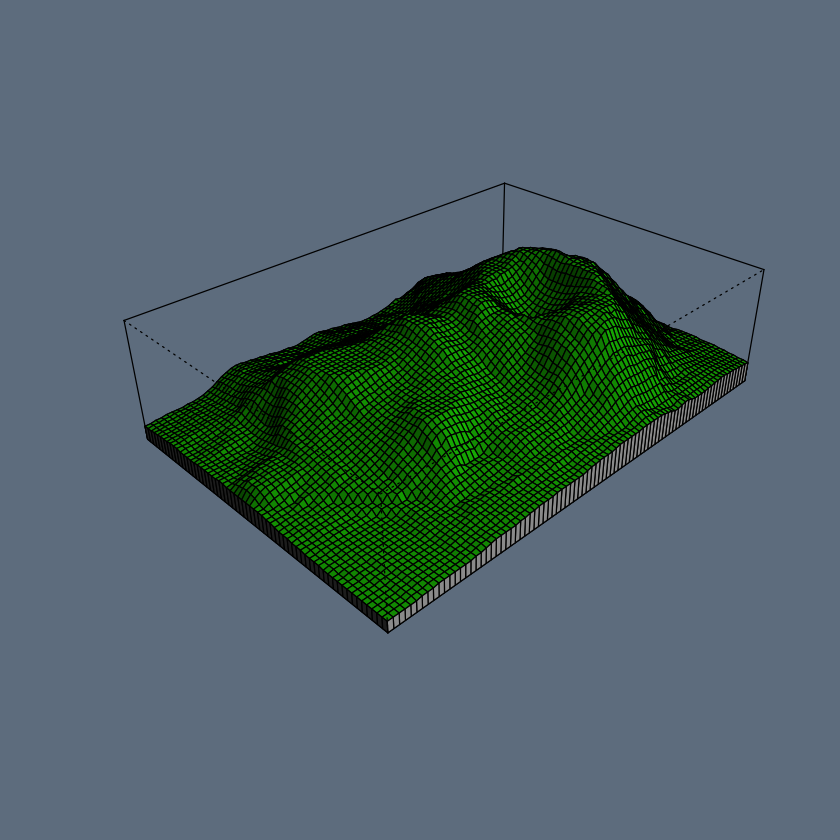

In [5]:
par(bg = "slategray")
persp(x, y, z, theta = 135, phi = 30, col = fill, scale = FALSE,
      ltheta = -120, lphi = 15, shade = 0.65, axes = FALSE)

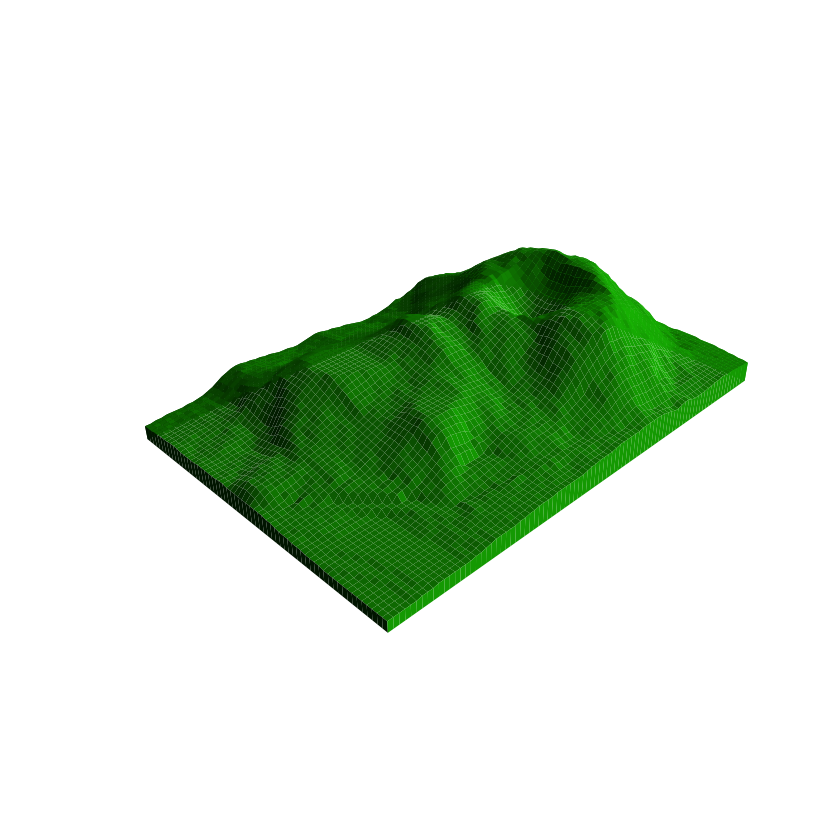

In [6]:
## Don't draw the grid lines :  border = NA
persp(x, y, z, theta = 135, phi = 30, col = "green3", scale = FALSE,
      ltheta = -120, shade = 0.75, border = NA, box = FALSE)

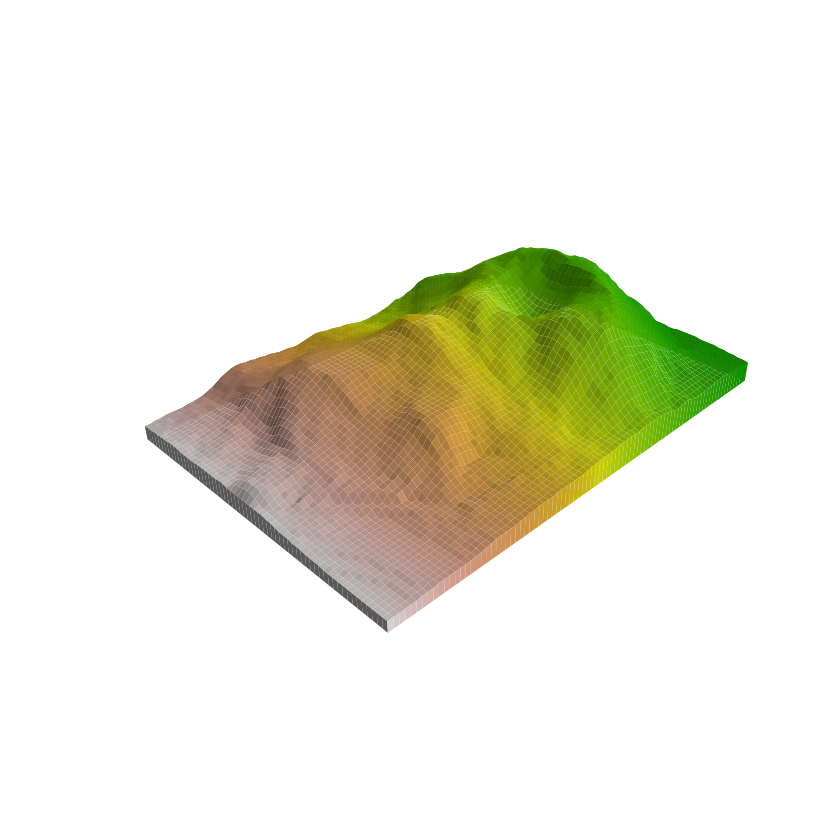

In [7]:
## `color gradient in the soil' :
fcol <- fill ; fcol[] <- terrain.colors(nrow(fcol))
persp(x, y, z, theta = 135, phi = 30, col = fcol, scale = FALSE,
      ltheta = -120, shade = 0.3, border = NA, box = FALSE)

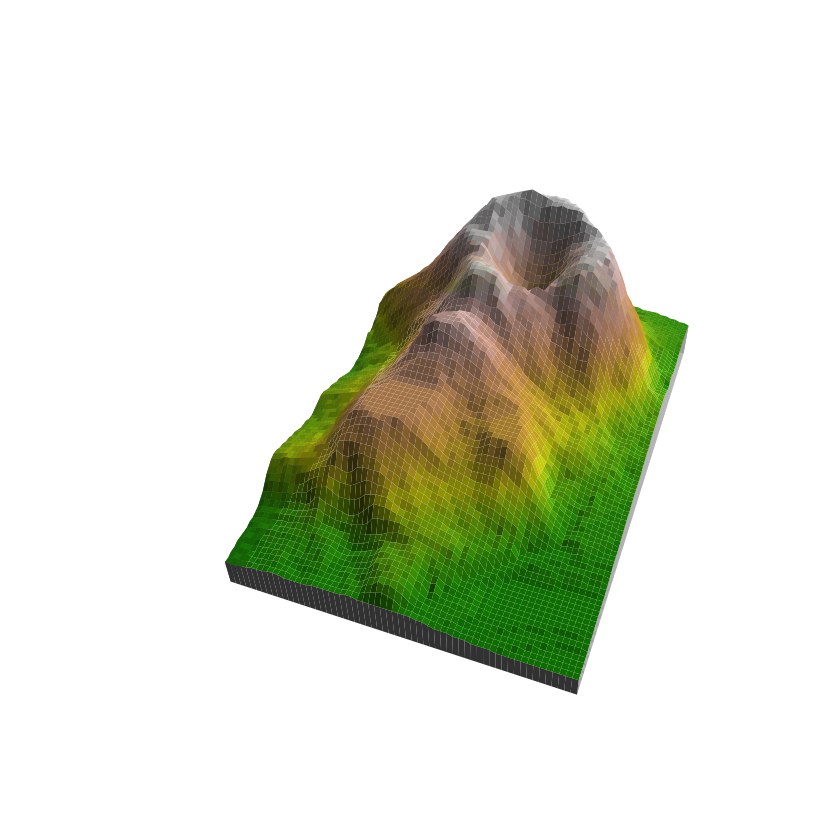

In [8]:
## `image like' colors on top :
fcol <- fill
zi <- volcano[ -1,-1] + volcano[ -1,-61] +
           volcano[-87,-1] + volcano[-87,-61]  ## / 4
fcol[-i1,-i2] <-
    terrain.colors(20)[cut(zi,
                           stats::quantile(zi, seq(0,1, length.out = 21)),
                           include.lowest = TRUE)]
persp(x, y, 2*z, theta = 110, phi = 40, col = fcol, scale = FALSE,
      ltheta = -120, shade = 0.4, border = NA, box = FALSE)

In [9]:
## reset par():
par(oldpar)